In [245]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Load training and testing data
X_train = np.loadtxt('X_train.csv', delimiter=',', skiprows=1)
X_test = np.loadtxt('X_test.csv', delimiter=',', skiprows=1)
y_train = np.loadtxt('y_train.csv', delimiter=',', skiprows=1)[:,1]


# Fit model and predict test values
y_pred = np.random.randint(y_train.min(), y_train.max(), X_test.shape[0])

# Arrange answer in two columns. First column (with header "Id") is an
# enumeration from 0 to n-1, where n is the number of test points. Second
# column (with header "EpiOrStroma" is the predictions.
test_header = "Id,PRP"
n_points = X_test.shape[0]
y_pred_pp = np.ones((n_points, 2))
y_pred_pp[:, 0] = range(n_points)
y_pred_pp[:, 1] = y_pred
np.savetxt('my_submission.csv', y_pred_pp, fmt='%d,%f', delimiter=",",
           header=test_header, comments="")

# Note: fmt='%d' denotes that all values should be formatted as integers which
# is appropriate for classification. For regression, where the second column
# should be floating point, use fmt='%d,%f'.
    

C:\Users\macla\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\macla\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


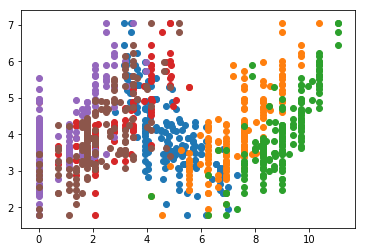

In [246]:
for i in range (0,6):
     plt.scatter(np.log(X_train[:,i]),np.log(y_train[:]))
    
    
x_train3 = np.log(X_train)
y_train = np.log(y_train)

In [239]:
data = x_train3
np.c_[data, y_train]
data = (data - data.mean())/data.std() #Normalize data

x_train1 = data[:,:6]
y_train1 = data[:,-1]
x_train= np.c_[x_train1, np.ones(x_train1.shape[0])]
print(x_train.shape)
print(y_train1.shape)


(168, 7)
(168,)


C:\Users\macla\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in subtract
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\macla\Anaconda3\lib\site-packages\numpy\core\_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [240]:
# convert to matrices and initialize theta
X2 = np.matrix(x_train)  
y2 = np.matrix(y_train1)  
theta2 = np.matrix(np.array([0,0,0,0,0,0,0]))  

#set hyper parameters
alpha = 0.01
iters = 100

In [241]:
theta2

matrix([[0, 0, 0, 0, 0, 0, 0]])

In [242]:
def computeCost(X, y, theta):  
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))


def gradientDescent(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost


In [243]:
#running the gd and cost function
# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)  


nan

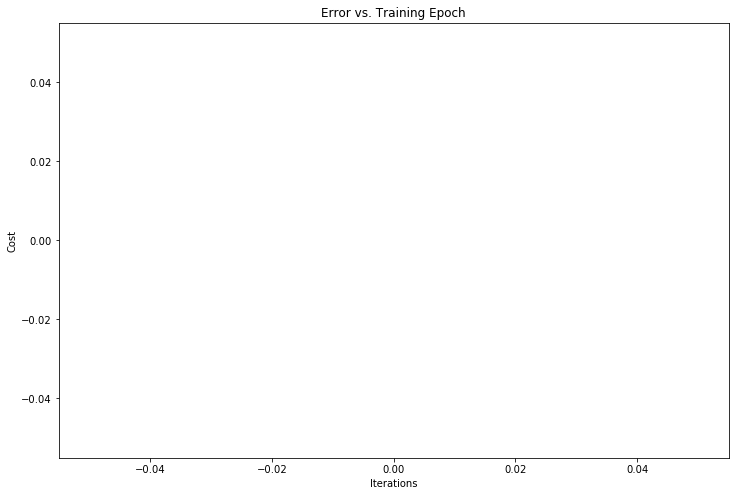

In [244]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost2, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  